# Perceptron For Non Linearly-Separable Data

In this assigment we derive and implement a version of the perceptron that does not assume the data is linearly separable.
We will use gradient descent to search for the hypothesis that best fit the training data.
The hypothesis space, prediction function and datasets are the same as the one we saw in class, what changes is the way we'll perform training.

We represent the perceptron with a vector of parameters $\theta$ (which is orthogonal to the hyperplane separating the two classes).  
We represent a dataset of $m$ examples with $(X=\{x^{(1)}, \ldots, x^{(m)}\},Y=\{y^{(1)}, \dots, y^{(m)}\})$, where $x^{(i)}\in R^{n}$ (the input is described by a vector of $n$ features), and $y^{(i)}=\{-1,+1\}$.
The score of the perceptron on an example $x$ is
$$s(x) = \theta^Tx = \sum_{j=1}^n \theta_jx_j~~~~~~~~~~~~~~~~~~~~~~(1)$$
As usual, the prediction is the sign of the score function $s()$.

Since we plan to update the parameters of our model using the gradient, we first need to define a cost function. We are going to use:
$$E(\theta) = \frac{1}{2}\sum_{i=1}^m \big(y^{(i)}-s(x^{(i)})\big)^2~~~~~~~~~~(2)$$

**Exercise 1.1** - Compute the gradient $\nabla E(\theta)$

As for the linear and logistic regression, the update rule is computed via the gradient of the cost function with respect to each parameter $\theta_j$:
$$\theta_j' = \theta_j-\eta\nabla E(\theta_j),~~~~~~~~~~~~~~~~~~~~~~~~~~~~(3)$$
where $\theta_j'$ is the j-th component of the gradient after the update, $\theta_j$ is the j-th component before the update, $\eta$ is the learning rate and $\nabla E(\theta_j)$ is the gradient of the cost function with respect to $\theta_j$. Consequently,
$$
\nabla E(\theta)=\left[\begin{array}{c}
\dfrac{\partial E}{\partial \theta_1}\Big(\frac{1}{2}\sum_{i=1}^m \big(y^{(i)}-s(x^{(i)})\big)^2\Big)\\
\dfrac{\partial E}{\partial \theta_2}\Big(\frac{1}{2}\sum_{i=1}^m \big(y^{(i)}-s(x^{(i)})\big)^2\Big) \\
\vdots \\
\dfrac{\partial E}{\partial \theta_n}\Big(\frac{1}{2}\sum_{i=1}^m \big(y^{(i)}-s(x^{(i)})\big)^2\Big)
\end{array}\right], ~~~(4)
$$
i.e. the derivative of $E$ with respect to each variable $\theta_j$.

Let's start by **computing the gradient of $E$ with respect to a generic $\theta_j$:**
 $$\dfrac{\partial E}{\partial \theta_j}\Big(\frac{1}{2}\sum_{i=1}^m \big(y^{(i)}-s(x^{(i)})\big)^2\Big)= ~? ~~~~~~~~~~~~~~~~~~~~~(5)$$
 Complete the formula (5) in the text box below. If you struggle with latex (the language used here for writing math formulas), you may skip this part and directly provide the implementation afterwards.

**Exercise 1.1**

The gradient of $E$ with respect to $\theta_j$ is:
$$
  \dfrac{\partial E}{\partial \theta_j}\Big(\frac{1}{2}\sum_{i=1}^m \big(y^{(i)}-s(x^{(i)})\big)^2\Big) = \sum_{i=1}^m \big(y^{(i)}-s(x^{(i)})\big)(-x_{j}^{(i)})
$$

Now let's implement the new version of the perceptron.
Let' start by loading libraries and data.

In [ ]:
# SETUP
# install python at version 3.10
!apt-get install python3.10

# update symbolic links to the newly installed python version
!ln -sf /usr/bin/python3.10 /usr/bin/python
!ln -sf /usr/bin/python3.10 /usr/bin/python3

# install scikit-learn 1.2.2
%pip install scikit-learn==1.2.2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.10 is already the newest version (3.10.12-1~22.04.3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


Text(0.5, 1.0, 'Random Data with 2 classes')

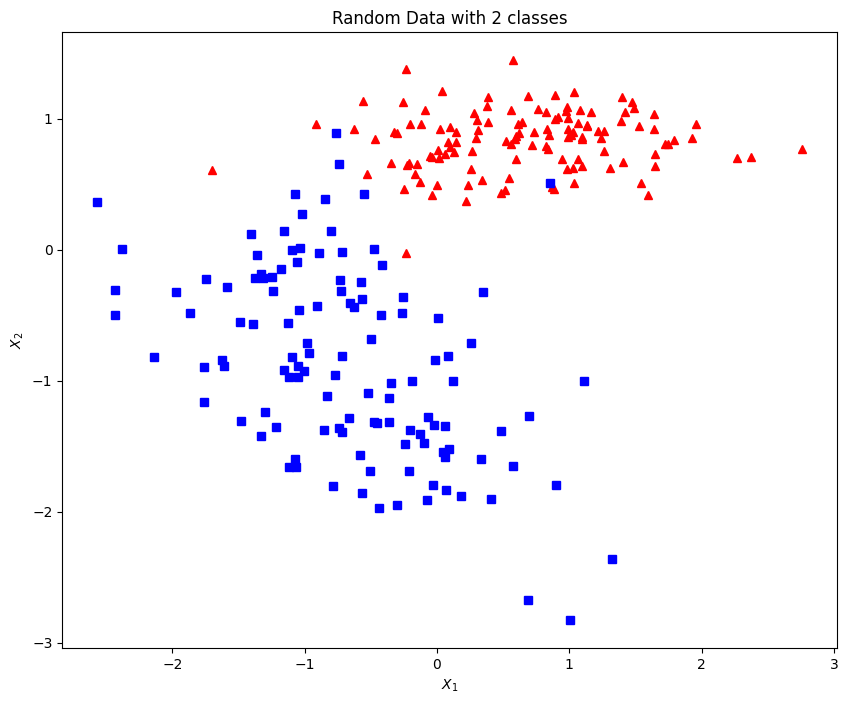

In [ ]:
#import the basic libraries and get the data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_art, y_art = datasets.make_classification(n_samples=300, n_features=2, random_state=123, n_redundant= 0, n_informative=2, scale=10, shift=10, n_clusters_per_class=1, class_sep=0.675)
y_art[y_art==0]=-1
y_art = y_art.reshape(len(y_art),1)
X_train, X_test, y_train, y_test = train_test_split(X_art, y_art, train_size=0.8, random_state=123)

# scale
scl = StandardScaler()
scl.fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

X_train = np.hstack([np.ones((X_train.shape[0],1)), X_train]) # adding a constant feature to account for the bias term
X_test = np.hstack([np.ones((X_test.shape[0],1)), X_test]) # adding a constant feature to account for the bias term

# visualize the data
fig = plt.figure(figsize=(10,8))
plt.plot(X_train[:, 1][y_train[:,0] == -1], X_train[:, 2][y_train[:,0] == -1], 'r^')
plt.plot(X_train[:, 1][y_train[:,0] == 1], X_train[:, 2][y_train[:,0] == 1], 'bs')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.title('Random Data with 2 classes')


**Exercise 1.2**

Check the code in the previous box and answer the following question

1. what does the code in line 19 do? "*X_train = np.hstack...*"
2. is the data plotted linearly separable?

Write your answers to **Exercise 1.2 in this box**
1. ANSWER: This line of code creates, using the command "np.ones", an array of ones that has the same number of rows of the X_train variable and a single column. Then, the command "np.hstack" stacks up arrays, putting in the elements in a specific order. In this case the first element will be taken from the array of ones created previously, and the second element will be taken from the X_train array. In the end the result is assigned back to the X_train variable. In conclusion this command is used to add a constant term to the model to take into account the bias term that moves the line from the origin.
2. ANSWER: No, the data are not linearly separable because there not exists a way to draw a straight line through the points, that divides the two classes perfectly.



Let's now implement a function Perceptron( $X$, $Y$, $\epsilon$, $\theta$ )  with 5 parameters.

The parameters are

*   X: the training data
*   Y: the labels of the training data
*   $\epsilon$: the algorithm stops as soon as the updates are smaller than this value
*   $\theta$: the initial value of the parameters of the model
*   $\eta$: the learning rate

The content of the function Perceptron() is the following:

-------
$\theta' = \theta -\eta\nabla E(\theta)$

while $|E(\theta')-E(\theta)| > \epsilon$

  $\hspace{1cm}\theta$ = $\theta'$

  $\hspace{1cm}\theta'$ = $\theta-\eta\nabla E(\theta)$

return $\theta'$

------

As we have seen for the linear regression, the vector $\theta$ gets updated until the stopping criterion is met. In our case such criterion relates to the change in the error: $|E(\theta')-E(\theta)| > \epsilon$, where $|x|$ is the absolute value of x (in our case the difference in the cost function before and after an update). Notice that the error is computed over all the training data, so the algorithm generally cycles multiple times over the training data.

**Exercise 1.3 Implement the following functions in the box below (according to the description in the same box)**
* **def s(X, theta)**
* **def cost_function_value(scores, Y)**
* **def update(X, Y, theta, eta)**

Then exec the box with the function my_perceptron() below.

In [ ]:
# compute the score of a perceptron with parameters theta on X, i.e. equation (1) above for all x in X
# returns a vectors of dimension m, i.e. equation (1) computed over all examples X
def s(X, theta):
  score = np.empty((X.shape[0],1))
  counter = 0
  for x in X:
    product = np.dot(np.squeeze(theta, axis = 1), x)
    score [counter,] = product
    counter += 1
  return score


# compute equation (2), where 'scores' are the values of equation (1) over X and Y the gold labels of examples X
def cost_function_value(scores, Y):
  cost_func = 0
  for i in range(Y.shape[0]):
      cost_func += 0.5 * ((Y[i] - scores[i])**2)
  return cost_func


# compute the update for the perceptron, i.e. equation (3)
# returns the updated vector theta'
def update(X, Y, theta, eta):
  theta_def = np.empty((3,1))
  for i in range(len(theta)):
    gradient = np.dot((Y - s(X, theta)).T, (-X[:, i]))
    product = eta * gradient
    theta_def[i] = theta[i] - product
  return theta_def


iterations: 255
final cost function value: [21.61265256]


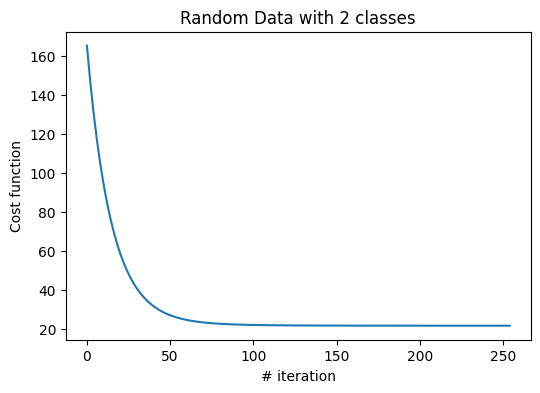

In [ ]:
def my_perceptron(X, Y, epsilon, theta, eta):

  error_values = [] # we keep record of all the cost function values for all iterations of the algorithm
  theta_prime = theta

  error_values.append(cost_function_value(s(X, theta), Y))
  theta_prime = update(X,Y, theta, eta)
  error_values.append(cost_function_value(s(X, theta_prime), Y))

  while abs(error_values[-1]-error_values[-2])>epsilon:
    theta_prime = update(X,Y, theta_prime, eta)
    error_values.append(cost_function_value(s(X, theta_prime), Y))
  return theta_prime, error_values


theta = np.ones((X_train.shape[1],1))*0.1
theta[0] = 0.2

theta_prime, error_values = my_perceptron(X_train, y_train, 0.0001, theta, 0.0001)

fig = plt.figure(figsize=(6,4))
plt.plot(error_values)
plt.xlabel("# iteration")
plt.ylabel("Cost function")
plt.title('Random Data with 2 classes')

print("iterations: " + str(len(error_values))+ "\nfinal cost function value: " + str(error_values[-1]))

Text(0.5, 1.0, 'Perceptron on Data with 2 classes')

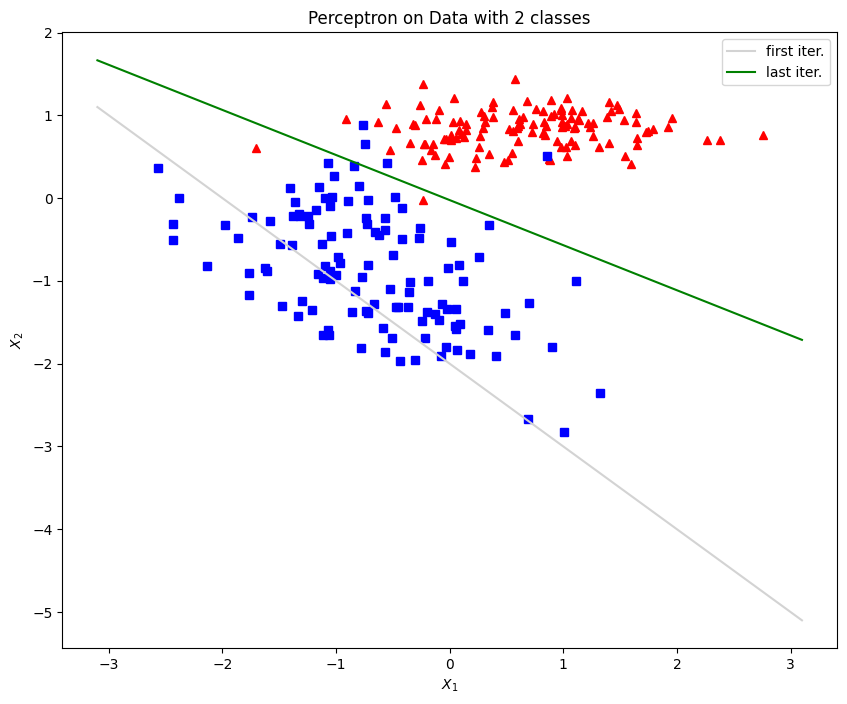

In [ ]:
# let's plot the perceptron (lightgray the first iteration, green the latest)

fig = plt.figure(figsize=(10,8))
plt.plot(X_train[:, 1][y_train[:,0] == -1], X_train[:, 2][y_train[:,0] == -1], 'r^')
plt.plot(X_train[:, 1][y_train[:,0] == 1], X_train[:, 2][y_train[:,0] == 1], 'bs')
Xvalues = np.linspace(-3.1, 3.1, 20)
plt.plot(Xvalues, -theta[1]/theta[2]*Xvalues-theta[0]/theta[2], 'lightgray', label='first iter.')
plt.plot(Xvalues, -theta_prime[1]/theta_prime[2]*Xvalues-theta_prime[0]/theta_prime[2], 'g', label='last iter.')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.title('Perceptron on Data with 2 classes')


**Exercise 1.4**

Compute the accuracy on the perceptron just implemented on the test set

In [ ]:
from sklearn.metrics import accuracy_score

y_predicted = s(X_test, theta_prime)
for j in range(len(y_predicted)):
  if y_predicted[j] > 0:
    y_predicted[j] = 1
  else:
    y_predicted[j] = -1

accuracy_score(y_test, y_predicted)


0.9666666666666667